# Relax Challenge

Defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven day period, identify which factors predict future user adoption.


We suggest spending 1 - 2 hours on this, but you're welcome to spend more or less. Please send us a brief writeup of your findings (the more concise, the better no more than one page), along with any summary tables, graphs, code, or queries that can help us understand your approach. Please note any factors you considered or investigation you did, even if they did not pan out. Feel free to identify any further research or data you think would be valuable.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Import two datasets
#Import user dataset
user = pd.read_csv('takehome_users.csv', encoding='ISO-8859-1')
user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
#Check column types
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [14]:
#Import engagement dataset
engage = pd.read_csv('takehome_user_engagement.csv')
engage.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [15]:
#Check the column data types
engage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [16]:
#Convert time_stamp to DateTime
engage.time_stamp = pd.to_datetime(engage.time_stamp)

#Check it again
engage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [17]:
engage.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


Now we can figure out how to calculate the target data, which is the users logged in 3 separated days in at least 7 days.

In [18]:
import datetime as dt

#Floor time_stamp and convert to integer
engage.time_stamp = engage.time_stamp.dt.floor('d').astype(np.int64)

#Sorting and remove duplicated days per users 
engage = engage.sort_values(['user_id', 'time_stamp']).drop_duplicates()

/var/folders/sc/zm445gtj461388gkngwypfbw0000gn/T/ipykernel_40380/2320092867.py:4: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  engage.time_stamp = engage.time_stamp.dt.floor('d').astype(np.int64)


In [21]:
#Rolling for 3
a = engage.groupby('user_id')['time_stamp'].rolling(window=3)

#Calculate the days differences
b = pd.to_timedelta((a.max()- a.min())).dt.days

#Get all values with number equals to 7 days
c = b[b == 7].index.get_level_values('user_id').tolist()

user_id        
1        0          NaN
2        1          NaN
         2          NaN
         3         24.0
         4         26.0
                   ... 
11996    207912     NaN
11997    207913     NaN
11998    207914     NaN
11999    207915     NaN
12000    207916     NaN
Name: time_stamp, Length: 207917, dtype: float64


In [23]:
#Print the unique values of adopted user id
au = np.unique(np.array(c))
print(au)

[    2    10    33 ... 11969 11975 11988]


In [30]:
#Make a DataFrame for user_id
adopted_user = pd.DataFrame({'user_id':au})
adopted_user['adopted'] = 1
adopted_user.head()

,user_id,adopted
0,2,1
1,10,1
2,33,1
3,42,1
4,50,1


In [36]:
#Left join the adopted_user DataFrame with User
user_ad = pd.merge(user, adopted_user, left_on='object_id', right_on='user_id', how='left')
user_ad.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,NaN,NaN
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,NaN,NaN
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,NaN,NaN
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,NaN,NaN


In [37]:
#Remove the user_id columns (duplicate)
user_ad = user_ad.drop(columns='user_id')

#Fill NaN values in adopted column to 0
user_ad['adopted'] = user_ad['adopted'].fillna(0)

#Convert adopted column to integer
user_ad['adopted'] = user_ad['adopted'].astype('int')

user_ad.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


Now we have the target column for the model. It is a classification proble. 'adopted' column is either 1 (adopted) or 0 (not-adopted).


Next, we need to do some feature engineering for other columns.

In [38]:
#Convert creation_time and last_session_creation_time to DateTime
user_ad['creation_time'] = pd.to_datetime(user_ad['creation_time'])
user_ad['last_session_creation_time'] = pd.to_datetime(user_ad['last_session_creation_time'], unit='s')
user_ad.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0


In [50]:
#Check the latest date of the last_session_creation_time, and make this as the most current time
latest_date = user_ad['last_session_creation_time'].max()
print(latest_date)

#Fill nan values to the last date of all days
user_ad['last_session_creation_time'] = user_ad['last_session_creation_time'].fillna(method = 'ffill')
user_ad.info()

2014-06-06 14:58:50
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  12000 non-null  datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
 10  adopted                     12000 non-null  int64         
 11  creation_days               12000 

In [51]:
#Convert the creation_time and last_session_creation_time to days until the latest_date, as an integer
user_ad['creation_days'] = (latest_date - user_ad['creation_time']).astype('timedelta64[D]').astype('int')
user_ad['last_login_days'] = (latest_date - user_ad['last_session_creation_time']).astype('timedelta64[D]').astype('int')

In [53]:
user_ad.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,creation_days,last_login_days
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0,45,45
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1,203,67
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0,443,443
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0,381,380
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0,505,500


In [57]:
#Check the unique values for creation_source
user_ad['creation_source'].value_counts()

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

In [59]:
#Create a new column to show if the user is invited. If there is user_id, it means it is invited
user_ad['invited'] = (user_ad['invited_by_user_id'] >0)
user_ad['invited'] = user_ad['invited'].astype('int')
user_ad['invited']

0        1
1        1
2        1
3        1
4        1
        ..
11995    1
11996    0
11997    1
11998    0
11999    0
Name: invited, Length: 12000, dtype: int64

Feature Engineering and data cleaning is completed. Let's do a quick EDA for columns

In [60]:
user_ad['opted_in_to_mailing_list'].value_counts()

0    9006
1    2994
Name: opted_in_to_mailing_list, dtype: int64

In [61]:
user_ad['enabled_for_marketing_drip'].value_counts()

0    10208
1     1792
Name: enabled_for_marketing_drip, dtype: int64

In [62]:
user_ad['org_id'].value_counts()

0      319
1      233
2      201
3      168
4      159
      ... 
396      9
397      8
400      8
386      7
416      2
Name: org_id, Length: 417, dtype: int64

In [64]:
user_ad['adopted'].value_counts()

0    10642
1     1358
Name: adopted, dtype: int64

<AxesSubplot:xlabel='creation_days', ylabel='Count'>

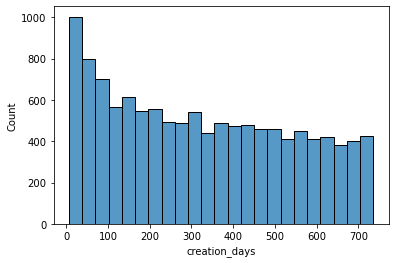

In [65]:
sns.histplot(data=user_ad, x="creation_days")

<AxesSubplot:xlabel='last_login_days', ylabel='Count'>

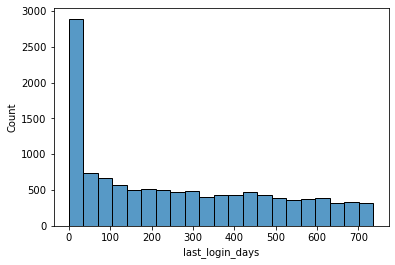

In [66]:
sns.histplot(data=user_ad, x='last_login_days')

In [68]:
user_ad.describe().T

,count,mean,std,min,25%,50%,75%,max
object_id,12000.0,6000.500000,3464.245950,1.0,3000.75,6000.5,9000.25,12000.0
opted_in_to_mailing_list,12000.0,0.249500,0.432742,0.0,0.00,0.0,0.00,1.0
enabled_for_marketing_drip,12000.0,0.149333,0.356432,0.0,0.00,0.0,0.00,1.0
org_id,12000.0,141.884583,124.056723,0.0,29.00,108.0,238.25,416.0
invited_by_user_id,6417.0,5962.957145,3383.761968,3.0,3058.00,5954.0,8817.00,11999.0
adopted,12000.0,0.113167,0.316810,0.0,0.00,0.0,0.00,1.0
creation_days,12000.0,324.568000,216.646173,6.0,129.00,304.0,506.00,736.0
last_login_days,12000.0,262.025667,226.103510,0.0,40.00,218.0,448.00,736.0
invited,12000.0,0.534750,0.498812,0.0,0.00,1.0,1.00,1.0


## Modeling

In [69]:
user_ad.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,creation_days,last_login_days,invited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0,45,45,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1,203,67,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0,443,443,1
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0,381,380,1
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0,505,500,1


In [78]:
#Choose the columns to be in the set to be splited
columns=['creation_source','opted_in_to_mailing_list','enabled_for_marketing_drip',
        'org_id','creation_days','last_login_days','invited']

X = user_ad[columns]
y = user_ad[['adopted']]

In [80]:
#Convert string vluaes to dummies
X = pd.get_dummies(X, columns=['creation_source'], drop_first=True)
X.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,creation_days,last_login_days,invited,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,0,11,45,45,1,0,0,0,0
1,0,0,1,203,67,1,1,0,0,0
2,0,0,94,443,443,1,1,0,0,0
3,0,0,1,381,380,1,0,0,0,0
4,0,0,193,505,500,1,0,0,0,0


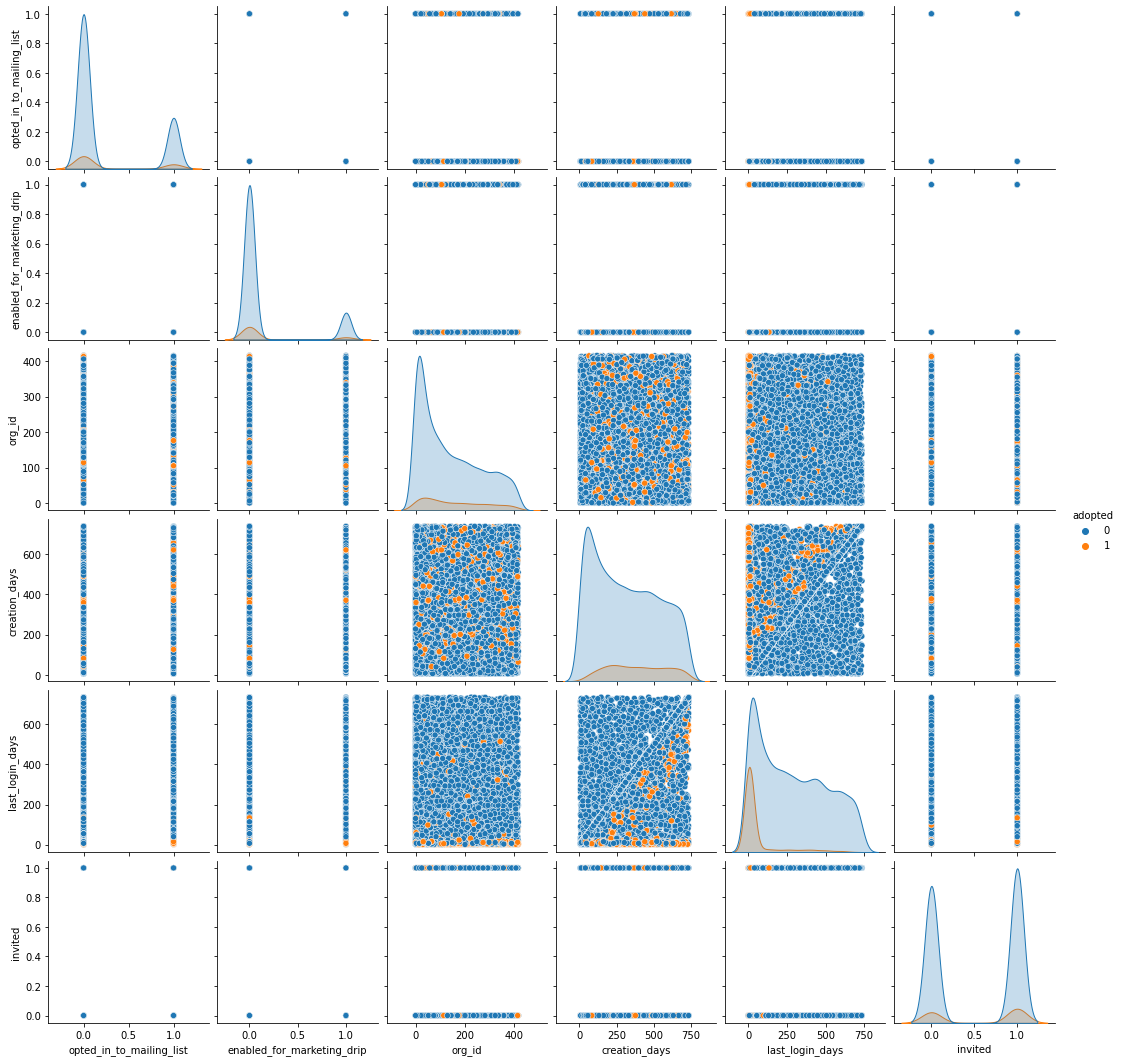

In [97]:
columns1=['creation_source','opted_in_to_mailing_list','enabled_for_marketing_drip',
        'org_id','creation_days','last_login_days','invited','adopted']

sns.pairplot(user_ad[columns1], hue='adopted')
plt.show()

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8400, 10) (3600, 10) (8400, 1) (3600, 1)


In [87]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 50,
                           n_jobs = -1,
                           bootstrap = True,
                           random_state = 42)
rf.fit(X_train, y_train)

print('R^2 Training Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(rf.score(X_train, y_train), 
                                                                                             rf.score(X_test, y_test)))

R^2 Training Score: 0.92 
R^2 Validation Score: 0.49


/var/folders/sc/zm445gtj461388gkngwypfbw0000gn/T/ipykernel_40380/3670566777.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


It seems that it is overfitting. We should do a grid search with cross validations

In [93]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [5, 10],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [5, 10],
    'n_estimators': [100, 1000]
}

# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)

grid_search.best_params_


Fitting 3 folds for each of 16 candidates, totalling 48 fits


/Users/andygong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/andygong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/andygong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/andygong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_va

/Users/andygong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/andygong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/andygong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/andygong/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_va

{'bootstrap': True,
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 1000}

In [94]:
best_grid = grid_search.best_estimator_
print('R^2 Training Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(best_grid.score(X_train, y_train), 
                                                                         best_grid.score(X_test, y_test)))

R^2 Training Score: 0.68 
R^2 Validation Score: 0.52


<BarContainer object of 10 artists>

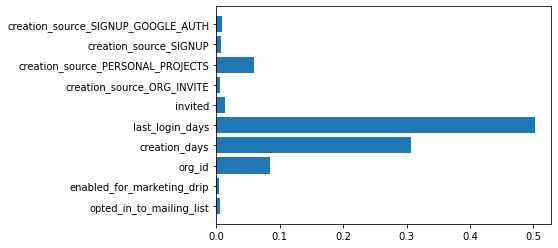

[CV] END bootstrap=True, max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=1000; total time=   7.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=1000; total time=  10.8s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=1000; total time=   7.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=1000; total time=  10.8s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=3, min_samples_split=5, n_estimators=1000; total time=   7.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=1000; total time=  10.8s
[CV] END bootstrap=True, max_depth=5, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   7.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=3, min_samples_split=5, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=3, m

In [95]:
plt.barh(X.columns, best_grid.feature_importances_)

As a result, the Last_login_days and Creation_days are the most important featrues to the adopted rate. Wet